## Implementing Simple Chatbot Using LangGraph

In [18]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [19]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [20]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [21]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-5-2025-08-07")
llm.invoke("Hello")

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 7, 'total_tokens': 26, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-C39WVvKusMyBVpSLPQcK61gtPbbhv', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--862233ea-ce13-411d-bf5c-70639f40afdb-0', usage_metadata={'input_tokens': 7, 'output_tokens': 19, 'total_tokens': 26, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [22]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="qwen/qwen3-32b")
llm_groq.invoke("Hey I am Ibrahim and I am a PhD student in CS")


AIMessage(content="<think>\nOkay, the user introduced himself as Ibrahim, a PhD student in Computer Science. I need to respond appropriately. Let me start by welcoming him and acknowledging his academic status. Since he's a PhD student, maybe he's looking for advice, resources, or just a friendly conversation. I should ask how I can assist him further. Keep it open-ended to let him specify his needs. Also, make sure the tone is supportive and encouraging. Maybe mention areas like research, programming, or academic challenges. Don't assume his specific needs, just invite him to ask anything related to his PhD in CS. Keep the response concise and friendly.\n</think>\n\nHello Ibrahim! Welcome, and congratulations on pursuing your PhD in Computer Science — that’s an exciting and challenging journey! How can I assist you today? Whether you need help with research ideas, programming, academic writing, or just want to discuss challenges in your field, feel free to ask. 😊", additional_kwargs={

In [23]:
### Nodes

def superbot(state: State):
    return {"messages": [llm_groq.invoke(state["messages"])]}

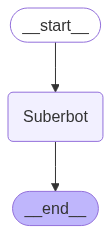

In [25]:
graph = StateGraph(State)

## ndde
graph.add_node("Suberbot", superbot)
## edges
graph.add_edge(START, "Suberbot")
graph.add_edge("Suberbot", END)

graph_builder = graph.compile()

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [26]:
## Invokation

graph_builder.invoke({"messages": "Hi, my name is Ibrahim and I like coding."})

{'messages': [HumanMessage(content='Hi, my name is Ibrahim and I like coding.', additional_kwargs={}, response_metadata={}, id='e87ccf8f-fd99-4e47-902c-7585adff5c14'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Ibrahim and mentioned he likes coding. I should respond in a friendly and encouraging way. Let's start by greeting him and acknowledging his interest. Maybe ask what kind of coding he does or what projects he's worked on. That could help in providing relevant advice or resources. Also, offer assistance in case he has any questions or needs help with something specific. Keep the tone positive and supportive to make him feel welcome. Let me check for any typos and ensure the response is natural.\n</think>\n\nHello Ibrahim! It's great to meet you. Coding is an awesome passion—what kind of projects are you working on, or what languages do you enjoy using? Whether it's web development, data science, game design, or something else, I'd love to hear more. Need h

### Streaming the responses

In [32]:
for event in graph_builder.stream({"messages": "Hello my nams is Ibrahim"}, stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hello my nams is Ibrahim', additional_kwargs={}, response_metadata={}, id='e57ef909-37fa-4a8f-82d6-e2461c40bd6a')]}
{'messages': [HumanMessage(content='Hello my nams is Ibrahim', additional_kwargs={}, response_metadata={}, id='e57ef909-37fa-4a8f-82d6-e2461c40bd6a'), AIMessage(content='<think>\nOkay, the user said "Hello my nams is Ibrahim." First, I need to respond politely. Since the user introduced themselves as Ibrahim, I should acknowledge that and offer assistance. I should keep the response friendly and open-ended to encourage them to ask questions or share more. Also, check if there\'s any typo in their message, like "nams" instead of "name." But maybe it\'s intentional or a different language. I\'ll stick to a simple greeting and ask how I can help. Make sure the tone is welcoming and supportive.\n</think>\n\nHello Ibrahim! Welcome. How can I assist you today? If you have any questions or need help with something, feel free to let me know. 😊'